contorns: [array([[[300, 271]],

       [[303, 271]]], dtype=int32), array([[[308, 269]]], dtype=int32), array([[[314, 262]],

       [[310, 266]]], dtype=int32), array([[[320, 255]],

       [[315, 260]]], dtype=int32), array([[[274, 250]],

       [[275, 251]],

       [[275, 252]],

       [[276, 252]],

       [[282, 258]],

       [[283, 258]],

       [[289, 264]],

       [[290, 264]],

       [[295, 269]],

       [[290, 264]],

       [[289, 264]],

       [[283, 258]],

       [[282, 258]]], dtype=int32), array([[[326, 248]],

       [[321, 253]]], dtype=int32), array([[[272, 248]]], dtype=int32), array([[[272, 243]],

       [[272, 246]]], dtype=int32), array([[[332, 241]],

       [[327, 246]]], dtype=int32), array([[[276, 237]],

       [[274, 239]]], dtype=int32), array([[[338, 234]],

       [[333, 239]]], dtype=int32), array([[[282, 230]],

       [[278, 234]]], dtype=int32), array([[[344, 227]],

       [[339, 232]]], dtype=int32), array([[[288, 223]],

       [[283, 2

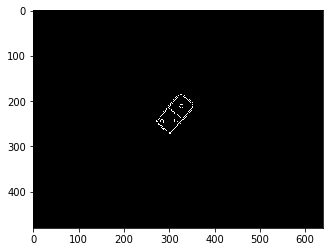

In [41]:
#MODUL VISIO
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

threshold = 0.5
lowerT = 8000
upperT = 30000

def detectarPunts(src,origen):
    punts = src.copy()
    #Passem la imatge a blanc i negre (255 | 0)
    mitjana = np.mean(src)
    dst[src-mitjana<=src*threshold]=0
    dst[src!=0]=255
    plt.imshow(dst,'gray')
    
    contorns = []
    jerarquia =[]
    
    punts = cv.Canny(punts,0,6)
    contorns,jerarquia = cv.findContours(punts,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    
    punts = cv.cvtColor(punts,cv.COLOR_GRAY2BGR)
    
    for i in range(len(contorns)):
        #Obtenim el area de la fitxa
        areaFitxa = cv.contourArea(contorns[i])
        if areaFitxa > lowerT and areaFitxa < upperT:
            areaRectangle = cv.boundingRect(contorns[i])
            part1=None
            part2=None
            nombreDePunts
            areaROI = None
            #https://github.com/HookJordan/DominoesDetection/blob/master/main.cpp
            if()
    
    
    
    
    
    
    
    
    
    print('contorns:',contorns)
    print('jerarquia',jerarquia)
    plt.imshow(punts,'gray')
    

if __name__ == '__main__':
    frame = cv.imread('src/test1fitxa.png')
    dst = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    detectarPunts(dst,frame)


    



Dots number: 225


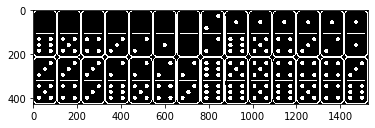

In [24]:
gray = cv2.imread("src/fitxes.png", 0)

## threshold
th, threshed = cv2.threshold(gray, 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]

plt.figure(1)
plt.imshow(threshed,'gray')
## filter by area
s1= 0
s2 = 1500
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Dots number: {}".format(len(xcnts)))
#Dots number: 23